# Algorithme des k plus proches voisins
## Principe

On cherche une correspondance entre les **caractéristiques physiques** d'un joueur de basket et son **poste** sur le terrain.

Pour simplifier, on considerera que les postes sont au nombre de trois : 

* le joueur Centre, noté **'C'** (position 5 sur le schéma)
* Le joueur Ailier, noté **'F'** (positions 3 et 4 sur le schéma)
* Le joueur arrière ou meneur de jeu, noté **'G'** (positions 1 et 2 sur le schéma)

<figure>
    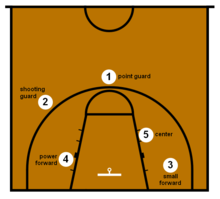
    <figcaption><b>Postes C, F G en basket</b></figcaption>
    </figure>

Comme pour tous les types d'apprentissage automatique, le principe est le suivant : 

* on commence par étudier une population donnée, dite d'_entrainement_. La qualité d'échantillonnage utilisé pour cette population va déterminer la bonne prédiction par cet algorithme. L'étude de cette population doit permettre de créer des ensembles d'objets aux propriétés similaires. Par exemple, l'ensemble constitué des joueurs de type *Centre* seront probablement plus *grands* et plus *forts* que les autres joueurs.

* On dispose ensuite d'une population exterieure à cet échantillonnage. On cherche à prevoir leur position sur le terrain par rapport à leurs caractéristiques physiques, d'après les résultats de l'étude préalable.

## La ligue de basket NBA

Les données sont issues de la page : [nba.com](https://fr.global.nba.com/playerindex)


La ligue de basket americaine contient environ 400 joueurs professionnels. La plupart de nationalité américaine. On dispose d'un extrait de ce fichier (voir dans le dossier `datas`), constitué de moins de 100 joueurs, classés par ordre alphabetique.

# Chargement du fichier base de données
## Python : librairies numpy et pandas
Le traitement des données se fera en langage *Python* et utilise la librairie `pandas`

Les données sont mises dans un DataFrame, une sorte de tableau à 2 entrées. Les valeurs de taille et de poids sont toutes de type `float` après ce premier traitement.

In [ ]:
# Version Jupyterlite
import pandas as pd  # on importe la librairie pandas 
from js import fetch

URL = "https://raw.githubusercontent.com/tix06/jupyterlite_NSI/master/files/datas/joueursNBA2020.csv"

res = await fetch(URL)
text = await res.text()

filename = 'datas.csv'

with open(filename, 'w') as f:
    f.write(text)

data = pd.read_csv(filename, sep=';')
tableau_reduit=data[['nom','equipe','poste','taille','poids','experience','pays']].dropna()
tableau_reduit['poids']=tableau_reduit['poids'].replace(to_replace ='kg', value = '', regex = True)
tableau_reduit['poids']=tableau_reduit['poids'].astype('float')
tableau_reduit['taille']=tableau_reduit['taille'].astype('float')

In [ ]:
# version locale: remplace la cellule precedente si utilisation en local
import numpy as np
import pandas as pd
data = pd.read_csv("datas/joueursNBA2020.csv", sep=";")
tableau_reduit=data[['nom','equipe','poste','taille','poids','experience','pays']].dropna()
tableau_reduit['poids']=tableau_reduit['poids'].replace(to_replace ='kg', value = '', regex = True)
tableau_reduit['poids']=tableau_reduit['poids'].astype('float')
tableau_reduit['taille']=tableau_reduit['taille'].astype('float')

In [ ]:
tableau_reduit.head() # on affiche le debut du tableau avec la fonction .head()

## Filtrer les données du DataFrame
On peut maintenant filtrer les joueurs du tableau selon le poste du joueur.
On utilise pour cela la fonction `.loc` associée au DataFrame. On utilise un predicat qui sera testé pour chacun des objets du DataFrame. Seuls les objets au prédicat `True` sont conservés : 

> `filtre = tableau_reduit[tableau_reduit['poste']=='C']` 

Puis on créé un nouveau *Dataframe* `df` que l'on affichera en entier

```
df = tableau_reduit[filtre]
df
```

> **Question a:** Dans cet exemple :  A quel poste jouent les joueurs conservés dans le DataFrame `df`? Vérifiez le dans la console...

## Afficher les joueurs sur un graphique taille-poids

On créé une fonction `points` qui ajoute le nuage de points pour chacun des éléments de la liste `postes` mise en paramètre. On créé un nuage de points de couleur et d'étiquette différent pour chaque poste occupé.

Les paramètres de cette fonction : 

* postes : on peut y mettre le caractère correspondant au poste comme 'G', 'F', ou 'C'. On peut aussi y mettre une liste constituée de certains, ou tous les postes.
* Les autres paramètres sont optionnels : il s'agit de la taille et de la forme du marqueur, et de la transparence.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle 

def points(postes,size=20,marker='o',alpha=0.5):
    """
    fonction qui ajoute des points au graphique existant
    
    Le paramètres :
    * postes peut être une liste de postes comme par exemple ['G','F','C']
    ou bien un seul poste, comme par exemple 'C'
    * les autres paramètres sont optionnels
    """
    for poste in postes:
        df = tableau_reduit[tableau_reduit['poste']==poste]
        x=df['taille']
        y=df['poids']
        plt.scatter(x,y,label=poste, s=size, marker=marker, alpha=alpha)

Avec les lignes suivantes, on affiche sur un même graphique les joueurs du tableau jouant aux postes 'G', 'F', 'C'.

Les joueurs du poste 'C' sont mis en relief avec un marqueur plus gros. 

> **Question b:** à quel endroit se regroupent les joueurs 'C'...

In [ ]:
plt.title('caractéristiques des joueurs de NBA 2020')
plt.xlabel("taille")
plt.ylabel("poids")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
points('F')
points('G')
points('C',100,'D',1)
axes = plt.gca()
plt.legend()
plt.show()

> **Travail :** Utilisez la fonction `points` pour représenter les 3 ensembles 'C', 'F' et 'G'. Mais cette fois, on veut mettre en relief : 

> * les joueurs 'F' dans un 2e graphique
> * Puis mettre en relief les joueurs 'G' dans un 3e graphique.

In [ ]:
# à completer


In [ ]:
# à completer


**Question c:** S'agit-il d'une méthode d'apprentissage:

    * supervisé?
    * non supervisé?
    
# Prediction du poste du joueur
## population dont le poste est inconnu
Certains joueurs ont des caractéristiques qui les rendent plus polyvalents. 
> **Question d:** En observant le tableau_reduit en entier : Quels sont ces postes polyvalents ? 

Ces joueurs n\'ont été mis sur aucun des  graphiques d'apprentissage vus plus haut. Et si vous utilisiez un algorithme prédictif pour deviner le meilleur poste auquel ils devraient être ? 
Nous allons étudier en détail cet algorithme, des k plus proches voisins...

Prenons par exemple les joueurs polyvalents à l'étiquette "G-F". Ces joueurs, sont-ils plutôt pressentis pour être G (arrière), ou F (ailier) ?

C'est ce que nous allons chercher à déterminer.

> **Travail :** à partie du DataFrame `tableau_reduit` : SELECTIONNER (filtrer) les joueurs dont le poste est 'G-F', et affecter ce nouveau DataFrame à la variable `df`

> Afficher alors ce nouveau tableau

In [ ]:
# à completer


## Choisir un joueur
> **Travail :** Repérer le numéro de l'index du premier joueur au poste 'G-F' dans ce tableau. Afficher l'ensemble des informations relatives à ce joueur à l'aide de l'instruction `ensemble.loc[numero index]` 

**Question e:** Indiquer la valeur de l'index pour ce joueur

In [ ]:
# à completer

## Utiliser la fonction *joueur()* pour l'afficher sur le graphique
Affichons un marqueur pour ce joueur au milieu de la distribution *d'entrainement*.
Pour cela, on utilise une fonction de nom `joueur()` dont les paramètres sont les suivants : 

* num : le numero de l'index du joueur dans le tableau
* rayon : le rayon du cercle dans lequel on recherche les k-plus proches voisins. Ce rayon est mesuré dans une unité relative au poids du joueur. L'echelle de l'axe des abscisses, la taille étant très différente, on réalise un calcul prenant en compte le ration DX/DY pour exprimer l'éloignement dans cette direction (un ecart de 10kg n'a pas la même signification qu'un écart de 10cm...)

In [ ]:
def joueur(num, rayon):
    """
    positionne le joueur de numero num
    et trace un cercle de rayon r exprimé dans une unité relative à l'axe des Y
    Le demi axe de l'ellipse pour X est calculé par rapport au ratio = DX/DY : 
    r_X = r_y * ratio
    """
    ratio = 0.005 # echelle des X / echelle des Y
    plt.title('caractéristiques des joueurs de NBA 2020')
    plt.xlabel("taille")
    plt.ylabel("poids")
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
    points(['F','G','C'])
    x = df.loc[num]['taille']
    y = df.loc[num]['poids']
    plt.scatter(x,y,s=50, marker='P', alpha=1)
    circle = plt.Circle((x, y), 1, color='r')
    fig = plt.gcf()  
    ax = fig.gca()  # gca() signifie Obtenir l'axe actuel
    ax.set_aspect(ratio)  # je choisi le ratio DX/DY pour les echelles des axes
    ax.add_artist(Ellipse((x, y), rayon*ratio, rayon, color='yellow',alpha=0.2))
    plt.legend()
    plt.show()

## Afficher le joueur sur le graphique
> **Travail :** utiliser la fonction `joueur()` pour afficher un marqueur pour ce joueur. On prendra un rayon égal à 20 pour le paramètre *rayon*. 

In [ ]:
# à completer

**Question f:** Reproduire le diagramme sur votre feuille, en couleur. Quel est le poste des plus proches voisins de ce joueur (contenus dans le cercle)?

## L'algorithme des k-plus proches voisins
L'algorithme des k-plus proches voisins peut s'écrire en langage naturel : 

1) trouver dans la collection d'entrainement les k plus proches voisins du joueur
2) Parmi ces proches voisins, trouver la classification majoritaire
3) Renvoyer la classification majoritaire

> Travail : Commencez par fabriquer un DataFrame `ensembleG` contenant tous les joueurs au poste 'G'.

> Puis, avec cette même methode, construire les DataFrame `ensembleF` et `ensembleC` 


In [ ]:
ensembleG = tableau_reduit[ # à completer
ensembleF = tableau_reduit[ #
ensembleC = tableau_reduit[ # 

> Enfin, construire un DataFrame `ensemble` qui sera réalisé par concaténation des 3 premiers.

> Afficher les premieres lignes de ce DataFrame (avec la fonction `.head()` 

> Aide sur la fonction concat : `ensemble = pd.concat([DataFrame1,DataFrame2,DataFrame3])` 

In [ ]:
ensemble = pd.concat([ensembleG, # à completer
ensemble.head()

Puis ajoutons une nouvelle colonne avec la *distance* au joueur de numero `num` dans le graphique : 

In [ ]:
def distance(num,ratio):
    x = tableau_reduit.loc[num]['taille']
    y = tableau_reduit.loc[num]['poids']
    ensemble['dist'] = ensemble.apply(lambda row: (((row["taille"] - x)/ratio)**2 + (row["poids"] - y)**2)**0.5, axis=1)

> **Travail:** Executer cette fonction avec pour paramètres `num = 9` et `ratio = 0.005`

Cette fonction va modifier le *Dataframe* `ensemble`. Afficher ce *Dataframe*

In [ ]:
# à completer


**Question g:** Parcourir les données du tableau: Quel est le joueur au profil physique le plus proche de votre joueur d'indice `num = 9`? Quel est son poste?

## Trier les résultats
> **Travail:** 

> 1. Trier le *Dataframe* `ensemble` selon la clé `dist`: `ensemble.sort_values(by=...)` 
2. Mettre le résultat dans un nouveau *Dataframe* appelé `df`

In [ ]:
df = ensemble.sort_values(by = # à completer
df.head()

**Question h:** Recopier les distances et les postes occupés par les 5 premiers voisins.

## Algorithme des k plus proches voisins
On voudrait maintenant dénombrer, par poste, les joueurs aux caractéristiques les plus proches de notre joueur au poste inconnu. Sur un echantillon des k premiers joueurs du tableau précédent.

> **Travail :** Compléter la fonction knn(k) qui renvoie un dictionnaire `score` avec pour chacune des clés, 'G', 'F', et 'G', le nombre de joueurs du tableau parmi les k premiers.

In [ ]:
# Correction
def knn(k):
    score={'G':0,'F':0,'C':0}
    for i in range(k):
        z=df.index[i]
        if df.loc[z]['poste']=='G' : 
            # à completer
            
        elif df.loc[z]['poste']=='F' :
            # à complter
              
        else : 
            # à completer
            
    return score  

> **Travail:** Utiliser la fonction pour rechercher les 8 plus proches voisins du joueur. Les 10 plus proches. 

**Question i:** Conclure.

In [ ]:
# à completer


## Prolongement
On peut réaliser ce même travail : pour rechercher les k plus proches voisins : pour un joueur d'un autre profil, comme par exemple 'F-G'

# Liens
* TP du site infoforall.fr avec des joueurs de football : [https://www.infoforall.fr/act/algo/k-plus-proches-voisins](https://www.infoforall.fr/act/algo/k-plus-proches-voisins)
* TP du site Lyceum.fr sur la prevision d'une mention au conseil de classe : [https://lyceum.fr/1g/nsi/8-algorithmique/3-algorithme-des-k-plus-proches-voisins](https://lyceum.fr/1g/nsi/8-algorithmique/3-algorithme-des-k-plus-proches-voisins)
* Cours sur pixees.fr: https://pixees.fr/informatiquelycee/n_site/nsi_prem_knn.html
* Article Wikipedia: https://fr.wikipedia.org/wiki/M%C3%A9thode_des_k_plus_proches_voisins


